# Task 6.4: Supervised Machine Learning: Regression (NHL Player Stats Project)

### The script contain the following points:

1a)Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, and Scikit-Learn)

1b)Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

2)Data Check/Cleaning

2a)Checking Descriptive Statistics and Extreme Values of Penalty_Minutes/Hits 

3)Scatter Plot (Data Prep for Regression Analysis) 

4)Linear Regression (Regression Analysis)

## 1a.Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, and Scikit-Learn)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

## 1b. Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

In [3]:
# Creating a data importing shortcut called 'path' for the NHL project folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/NHL Player Stats Analysis'

In [4]:
# Utilizing the newly created 'path' shortcut to import the 'NHL Player Data' dataset
nhl_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'nhl_states_prov1.csv'), index_col = False)

## 02. Data Check/Cleaning

In [10]:
# Checking if data import has correct shape
nhl_df.shape

(12270, 30)

In [9]:
nhl_df.head()

,Season,Rank,Player,Age,Position,Team,State_Province,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Playtime_Status,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage,Hart_Trophy?,Votes
0,2017,1,Connor McDavid\mcdavco01,20,C,EDM,Alberta,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,Top Minutes,21.133333,29.0,34,348.0,458.0,43.2,Yes,1604
1,2017,2,Sidney Crosby\crosbsi01,29,C,PIT,Pennsylvania,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,Lots of Playtime,19.883333,27.0,80,842.0,906.0,48.2,No,1104
2,2017,3,Patrick Kane\kanepa01,28,RW,CHI,Illinois,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,Top Minutes,21.400000,15.0,28,7.0,44.0,13.7,No,206
3,2017,4,Nicklas Backstrom\backsni02,29,C,WSH,Virginia,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,Lots of Playtime,18.266667,33.0,45,685.0,648.0,51.4,No,60
4,2017,5,Nikita Kucherov\kucheni01,23,RW,TBL,Florida,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,Lots of Playtime,19.433333,20.0,30,0.0,0.0,0.0,No,119


In [7]:
# Dropping this column since it is unnecessary 
nhl_df = nhl_df.drop(columns = ['Unnamed: 0'])

In [8]:
# Doesn't assign any options to the max number of columns so functions can display all columns
pd.options.display.max_columns = None

In [11]:
# Check for missing values
nhl_df.isnull().sum()

Season                 0
Rank                   0
Player                 0
Age                    0
Position               0
Team                   0
State_Province         0
Games_Played           0
Goals                  0
Assists                0
Points                 0
Plus_Minus             0
Penalty_Minutes        0
Point_Shares           0
Even_Strength_Goals    0
Powerplay_Goals        0
Shorthanded_Goals      0
Game_Winning_Goals     0
Shots                  0
Shooting_Percentage    0
Time_On_Ice            0
Playtime_Status        0
Avg_Time_On_Ice        0
Blocks                 0
Hits                   0
Faceoff_Wins           0
Faceoff_Losses         0
Faceoff_Percentage     0
Hart_Trophy?           0
Votes                  0
dtype: int64

In [12]:
# Checking for duplicates
dups = nhl_df.duplicated()

In [13]:
# No duplicates
dups.shape

(12270,)

## 02a. Checking Descriptive Statistics and Extreme Values of Penalty_Minutes/Hits

/var/folders/by/p0t5wv1j2qvg4mtq169k6zsr0000gn/T/ipykernel_33105/3921922405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nhl_hits['Hits'], bins=15)


<AxesSubplot: xlabel='Hits', ylabel='Density'>

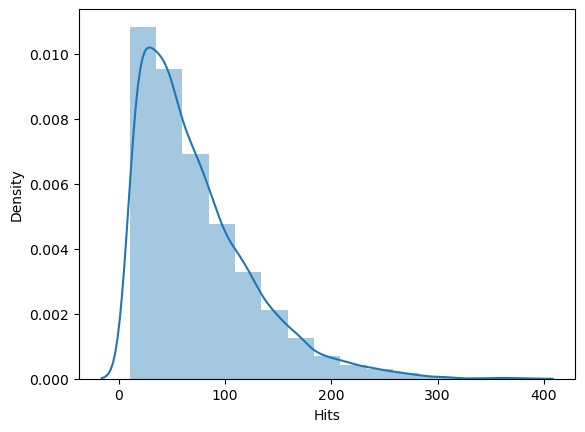

In [68]:
# Shows extreme values
sns.distplot(nhl_hits['Hits'], bins=15)

In [67]:
# Select only certain entries 
nhl_hits = nhl_df[nhl_df['Hits'] >= 10]

In [39]:
nhl_hits.shape

(9453, 30)

/var/folders/by/p0t5wv1j2qvg4mtq169k6zsr0000gn/T/ipykernel_33105/2018120397.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nhl_pen['Penalty_Minutes'], bins=25)


<AxesSubplot: xlabel='Penalty_Minutes', ylabel='Density'>

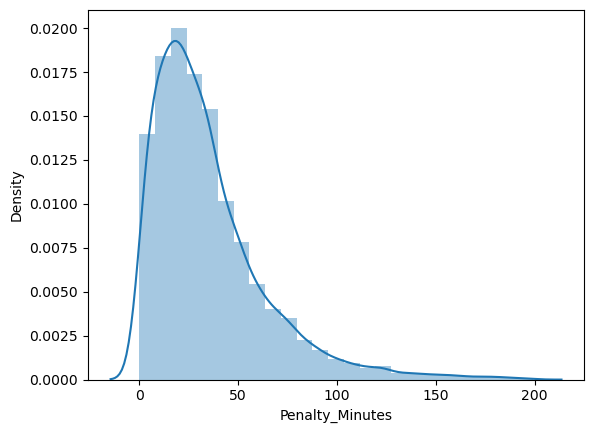

In [73]:
# Shows extreme values
sns.distplot(nhl_pen['Penalty_Minutes'], bins=25) 

In [63]:
# Select only certain entries 
nhl_pen = nhl_hits[nhl_hits['Penalty_Minutes'] <= 200]

In [69]:
# Check the mean
nhl_pen['Penalty_Minutes'].mean() 

34.91643559364759

In [74]:
# Check the median
nhl_pen['Penalty_Minutes'].median() 

28.0

In [70]:
# Check the max
nhl_pen['Penalty_Minutes'].max() 

199

## 03. Scatter Plot (Data Prep for Regression Analysis) 

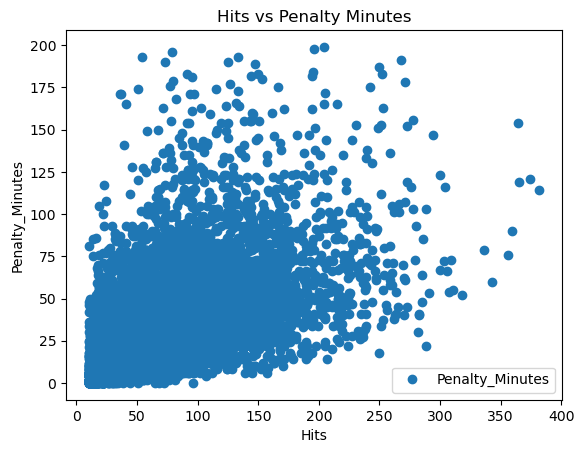

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
nhl_pen.plot(x = 'Hits', y='Penalty_Minutes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Hits vs Penalty Minutes')  
plt.xlabel('Hits')  
plt.ylabel('Penalty_Minutes')  
plt.show()

### Hypothesis: A player with higher hit totals will result in higher penalty minute totals. 

In [76]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = nhl_pen['Hits'].values.reshape(-1,1)
y = nhl_pen['Penalty_Minutes'].values.reshape(-1,1)

In [77]:
X

array([[34],
       [80],
       [28],
       ...,
       [22],
       [19],
       [13]])

In [78]:
y

array([[26],
       [24],
       [32],
       ...,
       [ 6],
       [ 6],
       [ 8]])

In [79]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Linear Regression (Regression Analysis)

In [80]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [81]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [82]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

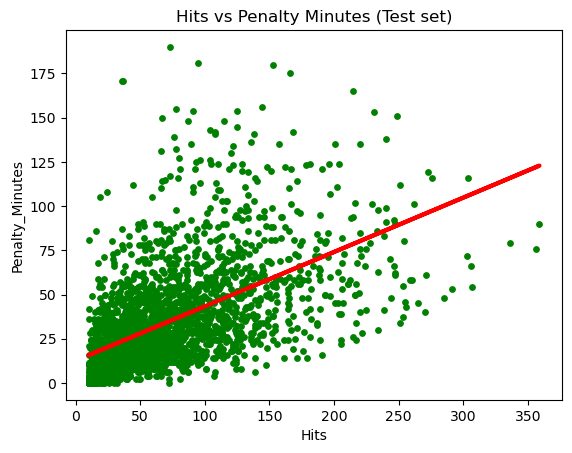

In [92]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hits vs Penalty Minutes (Test set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Penalty_Minutes')
plot_test.show()

### I think the line fits the data as best as it can since it goes through the majority of points on the graph. There are many outliers and the points are pretty spread out from the line, but this is expected since there are many player types that will result in extreme numbers in these categories (ex. enforcers, fourth line grinders, power forwards).

In [84]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [85]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.30719591]]
Mean squared error:  583.2825714962203
R2 score:  0.28627048686873846


In [86]:
y_predicted

array([[42.40788359],
       [19.0609944 ],
       [72.5130828 ],
       ...,
       [33.8063981 ],
       [39.9503163 ],
       [54.38852409]])

In [87]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32,42.407884
1,0,19.060994
2,71,72.513083
3,35,29.198459
4,80,41.179100
5,36,32.577614
6,32,43.636667
7,37,38.721533
8,18,32.270419
9,0,22.440149


### The model performed not the best since some values are pretty closely predicted but some are very off. This was due to the many expected outliers and the fact that many points on the graph are not tight with the line (a low r squared score).

### The data itself definetly affected the results due to biases in each variable. There are extreme inputs in each category like players who have very high hit totals or very high penalty minutes. The thing that makes these two variables difficult to compare, is that some players will have very high penalty minutes but a much smaller ratio of hits possibly due to their role (skilled player, enforcer). Same thing vice verca which will produce some skewed results.

##### Compare how the regression fits the training set

In [88]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [89]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [90]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.30719591]]
Mean squared error:  605.2993369826511
R2 score:  0.3003573809786386


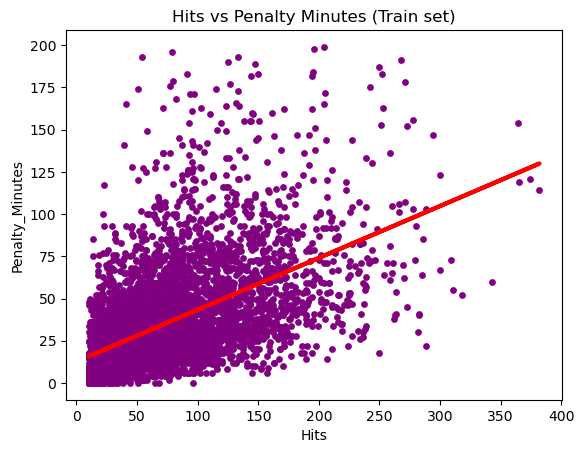

In [91]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Hits vs Penalty Minutes (Train set)')
plot_test.xlabel('Hits')
plot_test.ylabel('Penalty_Minutes')
plot_test.show()